# Work with categorical Data

Machine Learning algorithms require that input data must be in numerical format. Only then the algorithms work successfully on them. So, the text data must be converted into numbers before they are fed into an algorithm.

as we said before Categorical data can be **Ordinal** or **Nominal**


### Ordinal variable
can be understood as categorical values that can be sorted or ordered. For example, T-shirt size would be an ordinal feature, because we can define an order XL > L > M.


### Nominal variable
nominal features don't imply any order and, to continue with the previous example, we could think of T-shirt color as a nominal feature since it typically doesn't make sense to say that, for example, red is larger than blue.




## Table of Contents
1. Work with Ordinal Features with pandas `map` method.
2. Work with Nominal Features with pandas `get_dummies` method.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df = pd.read_csv('../dastasets/t-shirts.csv')
df

Date ordered Order number Brand Size   Color   Design  Price  \
0     2016-05-05      SDH-YU0  Yolo    L     red   spiral  14.47   
1     2016-05-06      SDH-YU1  Yolo  XXL   green   spiral  16.24   
2     2016-05-07      SDH-YU2  BLOT   XL   black  Stripes  14.32   
3     2016-05-08      SDH-YU3  Kent  XXL   green    plain  14.07   
4     2016-05-09      SDH-YU4  BUCK   XL   white   spiral  15.56   
..           ...          ...   ...  ...     ...      ...    ...   
495   2017-09-12    SDH-YU495  Wang   XS   green  diamond  15.03   
496   2017-09-13    SDH-YU496  BUCK    M   black  Stripes  14.49   
497   2017-09-14    SDH-YU497  Kent  XXL  purple    plain  15.61   
498   2017-09-15    SDH-YU498  Yolo    S     red    plain  13.49   
499   2017-09-16    SDH-YU499  BLOT    S   black   spiral  14.75   

    Delivery status  
0           damaged  
1           delayed  
2         delivered  
3           damaged  
4    order received  
..              ...  
495         damaged  
496        shipping  
497        shipping  
498  order received  
499        shipping  

[500 rows x 8 columns]

## Make some EDA and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date ordered     500 non-null    object 
 1   Order number     500 non-null    object 
 2   Brand            500 non-null    object 
 3   Size             500 non-null    object 
 4   Color            500 non-null    object 
 5   Design           500 non-null    object 
 6   Price            500 non-null    float64
 7   Delivery status  500 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


In [4]:
df['Brand'].value_counts()

Yolo    109
Kent    107
BUCK    104
Wang    103
BLOT     77
Name: Brand, dtype: int64

In [5]:
df['Size'].value_counts()

XXL    94
XS     88
S      88
M      82
L      75
XL     73
Name: Size, dtype: int64

In [6]:
df['Color'].value_counts()

green     104
indigo     89
red        78
purple     78
black      77
white      74
Name: Color, dtype: int64

In [7]:
df['Design'].value_counts()

diamond    117
checked    107
Stripes    106
spiral      89
plain       81
Name: Design, dtype: int64

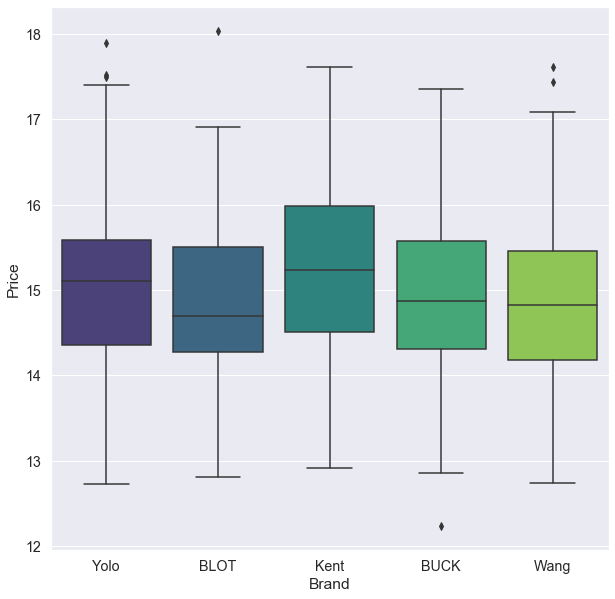

In [8]:
sns.boxplot(x='Brand', y='Price', data=df, palette='viridis')

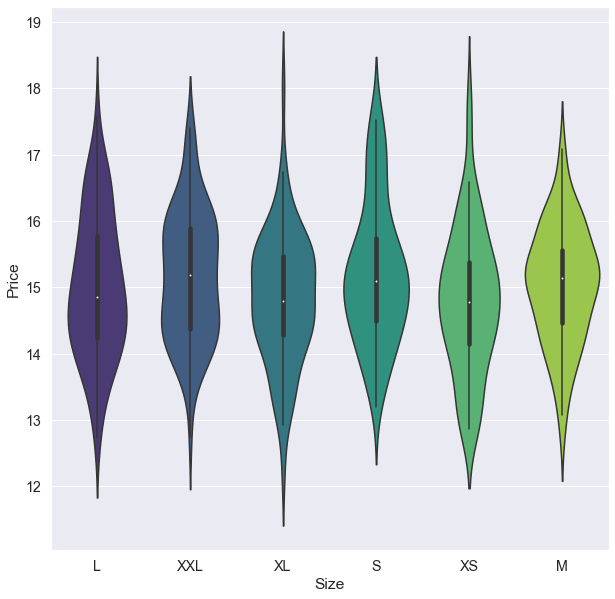

In [9]:
sns.violinplot(x='Size', y='Price', data=df, palette='viridis')

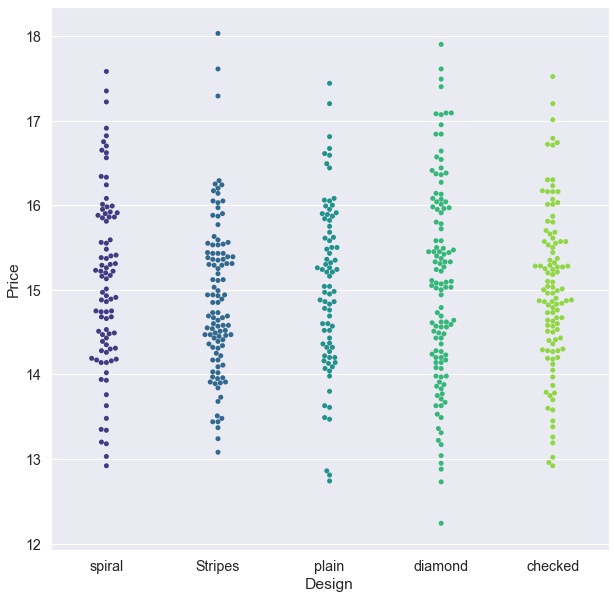

In [10]:
sns.swarmplot(x='Design', y='Price', data=df, palette='viridis')

**Extracted Info**
- Design, Color, Brand are Nominal Categorical features
- Size is Ordinal Categorical feature

## 1) Work with Ordinal Features with pandas `map` method.

Ordinal features are those with some order associated with them. We can tell from the sample of ordinal features below these features have an order that may be important.

For example we have Size column contains ordinal data so that XS < S < M < L < XL < XXL 

In [11]:
df['Size'].value_counts()

XXL    94
XS     88
S      88
M      82
L      75
XL     73
Name: Size, dtype: int64

In [12]:
size_dict = {'XS':1, 
        'S':2, 
        'M':3, 
        'L':4, 
        'XL':5, 
        'XXL':6}

# apply using map
df['Size'] = df['Size'].map(size_dict)

In [13]:
df.head()

Date ordered Order number Brand  Size  Color   Design  Price Delivery status
0   2016-05-05      SDH-YU0  Yolo     4    red   spiral  14.47         damaged
1   2016-05-06      SDH-YU1  Yolo     6  green   spiral  16.24         delayed
2   2016-05-07      SDH-YU2  BLOT     5  black  Stripes  14.32       delivered
3   2016-05-08      SDH-YU3  Kent     6  green    plain  14.07         damaged
4   2016-05-09      SDH-YU4  BUCK     5  white   spiral  15.56  order received

**note**<br>
you can use `LabelEncoder` from sklearn to generate the integer volumns from categorical features.

### Get The Inverse

In [14]:
inv_size_mapping = {v: k for k, v in size_dict.items()}
inv_size_mapping

{1: 'XS', 2: 'S', 3: 'M', 4: 'L', 5: 'XL', 6: 'XXL'}

In [15]:
df['size_inv'] = df['Size'].map(inv_size_mapping)
df

Date ordered Order number Brand  Size   Color   Design  Price  \
0     2016-05-05      SDH-YU0  Yolo     4     red   spiral  14.47   
1     2016-05-06      SDH-YU1  Yolo     6   green   spiral  16.24   
2     2016-05-07      SDH-YU2  BLOT     5   black  Stripes  14.32   
3     2016-05-08      SDH-YU3  Kent     6   green    plain  14.07   
4     2016-05-09      SDH-YU4  BUCK     5   white   spiral  15.56   
..           ...          ...   ...   ...     ...      ...    ...   
495   2017-09-12    SDH-YU495  Wang     1   green  diamond  15.03   
496   2017-09-13    SDH-YU496  BUCK     3   black  Stripes  14.49   
497   2017-09-14    SDH-YU497  Kent     6  purple    plain  15.61   
498   2017-09-15    SDH-YU498  Yolo     2     red    plain  13.49   
499   2017-09-16    SDH-YU499  BLOT     2   black   spiral  14.75   

    Delivery status size_inv  
0           damaged        L  
1           delayed      XXL  
2         delivered       XL  
3           damaged      XXL  
4    order received       XL  
..              ...      ...  
495         damaged       XS  
496        shipping        M  
497        shipping      XXL  
498  order received        S  
499        shipping        S  

[500 rows x 9 columns]

## 2) Work with Nominal Features with pandas `get_dummies` method.

<img src='https://miro.medium.com/max/1400/1*hZLqbZqqrwiqkGxxl2vYkg.png'>

Nominal features are categorical features that have no numerical importance. Order does not matter.

One-hot encoding is a better technique when order doesn’t matter. For example, in the feature Color or Brand there is no obvious order here. One value is not better than another.

In a situation like this, where order doesn’t matter, integer encoding could lead to poor model performance and should not be used.

In one hot encoding, a new binary (dummy) variable is created for each unique value in the categorical variable. For example In the chart above, we had three unique colors and so we create three new features, one for each color. If the value is true, the integer 1 is placed in the field, if false then a 0.

In [16]:
df['Design'].value_counts()

diamond    117
checked    107
Stripes    106
spiral      89
plain       81
Name: Design, dtype: int64

In [17]:
df['Color'].value_counts()

green     104
indigo     89
red        78
purple     78
black      77
white      74
Name: Color, dtype: int64

In [18]:
df['Brand'].value_counts()

Yolo    109
Kent    107
BUCK    104
Wang    103
BLOT     77
Name: Brand, dtype: int64

In [19]:
df['Delivery status'].value_counts()

order received    106
shipping          104
damaged           100
delayed            95
delivered          95
Name: Delivery status, dtype: int64

In [20]:
df = pd.get_dummies(df, columns=['Design', 'Color', 'Brand', 'Delivery status'], drop_first=True)

In [21]:
df

Date ordered Order number  Size  Price size_inv  Design_checked  \
0     2016-05-05      SDH-YU0     4  14.47        L               0   
1     2016-05-06      SDH-YU1     6  16.24      XXL               0   
2     2016-05-07      SDH-YU2     5  14.32       XL               0   
3     2016-05-08      SDH-YU3     6  14.07      XXL               0   
4     2016-05-09      SDH-YU4     5  15.56       XL               0   
..           ...          ...   ...    ...      ...             ...   
495   2017-09-12    SDH-YU495     1  15.03       XS               0   
496   2017-09-13    SDH-YU496     3  14.49        M               0   
497   2017-09-14    SDH-YU497     6  15.61      XXL               0   
498   2017-09-15    SDH-YU498     2  13.49        S               0   
499   2017-09-16    SDH-YU499     2  14.75        S               0   

     Design_diamond  Design_plain  Design_spiral  Color_green  ...  Color_red  \
0                 0             0              1            0  ...          1   
1                 0             0              1            1  ...          0   
2                 0             0              0            0  ...          0   
3                 0             1              0            1  ...          0   
4                 0             0              1            0  ...          0   
..              ...           ...            ...          ...  ...        ...   
495               1             0              0            1  ...          0   
496               0             0              0            0  ...          0   
497               0             1              0            0  ...          0   
498               0             1              0            0  ...          1   
499               0             0              1            0  ...          0   

     Color_white  Brand_BUCK  Brand_Kent  Brand_Wang  Brand_Yolo  \
0              0           0           0           0           1   
1              0           0           0           0           1   
2              0           0           0           0           0   
3              0           0           1           0           0   
4              1           1           0           0           0   
..           ...         ...         ...         ...         ...   
495            0           0           0           1           0   
496            0           1           0           0           0   
497            0           0           1           0           0   
498            0           0           0           0           1   
499            0           0           0           0           0   

     Delivery status_delayed  Delivery status_delivered  \
0                          0                          0   
1                          1                          0   
2                          0                          1   
3                          0                          0   
4                          0                          0   
..                       ...                        ...   
495                        0                          0   
496                        0                          0   
497                        0                          0   
498                        0                          0   
499                        0                          0   

     Delivery status_order received  Delivery status_shipping  
0                                 0                         0  
1                                 0                         0  
2                                 0                         0  
3                                 0                         0  
4                                 1                         0  
..                              ...                       ...  
495                               0                         0  
496                               0                         1  
497                               0                         1  
498         

we use `drop_first` to get k-1 features, due to the last feature will be redundant and correlated with other features so it can cause problems.

- Spiral dummy variable has been removed from Design column
- Black dummy variable has been removed from Color column
- Blot dummy variable has been removed from Brand column

**note**<br>
you can use `OneHotEncoder` from sklearn to generate the dummy variables from categorical features.

# Great Work!